# Handling images

We will work with images which are in **geotiff** format. These are standard image files (i.e. they are ``.tif`` files) but they also contain information on the coordinates and the base projection of the image. There are various tools for making and converting these images but one important thing to know is that they are the becoming a standard that you are very likely to encounter as a way to store data and deliver it on the web. If you download tiles of data served up as google earth layers, you may well find that you have a geotiff. 

Here is an example - it uses the **gdal** library for manipulating geospatial data. The image is a freely available download of the NASA *blue marble* image set which I retrieved for you.

In [1]:
%pylab inline

import cartopy
from osgeo import gdal
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls Resources/

README.md


In [3]:
globalmarble      = gdal.Open("Resources/BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF")
globalmarble_img  = globalmarble.ReadAsArray().transpose(1,2,0)

# Note that we convert the gdal object into an image array - and also have to re-organise the data 
# This is a numpy call that you can look up to see what it does and you can also look
# at the original array data to see what is there.

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [4]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
plt.imshow(globalmarble_img)

NameError: name 'globalmarble_img' is not defined

<Figure size 864x864 with 0 Axes>

This looks really nice but it is just the original image plotted in its original shape. 

The gdal object can tell you the projection which applies to the original data and various other attributes. This might not seems particularly useful at this point, but it is helpful to realise that there is a lot of information being passed around behind the scenes when you use these tools.

In [5]:
print ("1 - ", globalmarble.GetProjection(), "\n")
print ("2 - ", globalmarble.GetDescription(), "\n")
print ("3 - ", globalmarble.GetMetadata(), "\n")
print ("4 - ", globalmarble.GetGeoTransform())

AttributeError: 'NoneType' object has no attribute 'GetProjection'

## Projections

What if we want to use a different projection for the image. For example, we might want to use this as a background to plot some other information. How does this work ?

Let's try what we used before to plot with a different projection. Specifically, let's try an orthographic projection which should wrap the image around a sphere and show us the disk from a particular orientation. Here is one I made earlier ... the output should look like this:

<img src="../Images/OrthographicProjectionBlueMarble.png" width=30%>

NameError: name 'globalmarble_img' is not defined

/usr/share/miniconda3/envs/jupyter/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


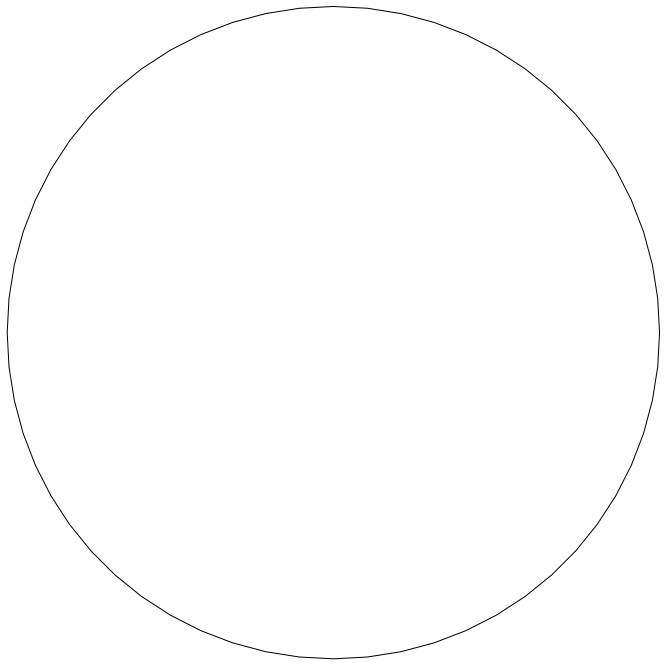

In [6]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.Orthographic())
plt.imshow(globalmarble_img, zorder=0)
ax.coastlines(color="Yellow", zorder=1)  
plt.show()

OK, that didn't look like the sample image that I claimed it should and the reason is that we didn't tell the plotting routines what the original projection for the data was. Here is the fix: tell the ``imshow`` command the transformation of the original data - (this can take a little while to process).

NameError: name 'globalmarble_img' is not defined

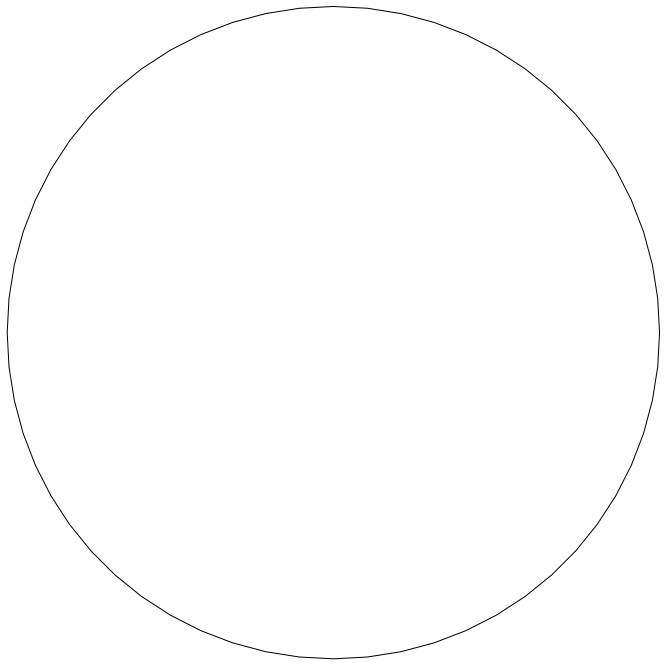

In [7]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.Orthographic())
plt.imshow(globalmarble_img, zorder=0, transform=ccrs.PlateCarree())
ax.coastlines(color="Yellow", zorder=1)  

plt.show()

You can try other projections here, though I have found quite a few do not behave in quite the way you expect !

Feel free to play with these data which are global magnetic intensity, the global etopo database of topography and bathymetry in color format and a black/white (height only) version of the same thing, all of them have the base projection of **PlateCarree**. Note that we can define a variable which points to this function and pass it into the transform argument of ``imshow``

In [8]:
base_projection   = ccrs.PlateCarree() 

globalmag         = gdal.Open("Resources/EMAG2_image_V2_no_compr.tif")
globalmag_img     = globalmag.ReadAsArray().transpose(1,2,0)
globalmag_img_s   = globalmag_img[::2,::2,::]
del(globalmag)

globaletopo       = gdal.Open("Resources/color_etopo1_ice_low.tif")
globaletopo_img   = globaletopo.ReadAsArray().transpose(1,2,0)
del(globaletopo)

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [9]:
print (globalmag_img.shape)
print (globalmag_img_s.shape)
print (globalmarble_img.shape)

NameError: name 'globalmag_img' is not defined

NameError: name 'globalmag_img_s' is not defined

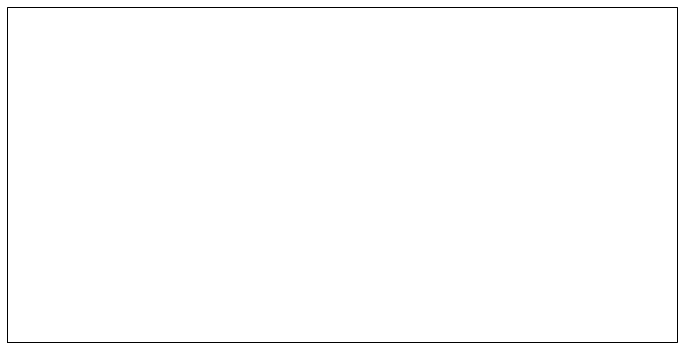

In [10]:
# Global pretty map ... can you make one centred on Australia and save it to an image ?

#projection = ccrs.Orthographic(central_longitude=80.0, central_latitude=30.0, globe=None)
this_projection = ccrs.PlateCarree()

global_extent     = [-180.0, 180.0, -90.0, 90.0]

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=this_projection)
ax.imshow(globalmag_img_s, origin='upper', transform=base_projection, extent=global_extent)
ax.imshow(globalmarble_img, origin='upper', transform=base_projection, extent=global_extent, alpha=0.5)
ax.coastlines(color="yellow")

plt.show()